### MULTICLASS GENRE CLASSIFICATION FOR 6 MUSIC GENRES


* Required dependencies and import every library and our config.py files to the notebook.

Config file consists of important details like sampling rate, dataset and test data directories, frame size, hop size, etc

In [2]:
%matplotlib inline
import itertools
import numpy, scipy, matplotlib.pyplot as plt, pandas, librosa,sklearn
import config

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

* We obtain data from our dataset that we created from <u>previous file</u>.

In [4]:
data_set=pandas.read_csv('data_set.csv',index_col=False)
GENRES=['METAL', 'CLASSICAL', 'HIPHOP', 'BLUES', 'POP', 'REGGAE']

number_of_rows,number_of_cols = data_set.shape
# data_set[:5].style
data_set[95:105].style #...etc

* We split our dataset
* Then we seperate both train and test datasets into two part.
* One for feature columns, one for class column (genre).

In [5]:
from sklearn.model_selection import train_test_split

data_set_values=numpy.array(data_set)

train, test = train_test_split(data_set_values, test_size = 0.85,random_state=2,stratify=data_set_values[:,number_of_cols-1])

train_x=train[:,:number_of_cols-1]
train_y=train[:,number_of_cols-1]

test_x=test[:,:number_of_cols-1]
test_y=test[:,number_of_cols-1]

print("Training data size: {}".format(train.shape))
print("Test data size: {}".format(test.shape))

Training data size: (90, 37)
Test data size: (510, 37)


* Now we create the function to call the confusion matrix and the accuracy graph plot with the dataset, classes and genre classification algorithm model as its parameter

In [7]:
def confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = numpy.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max()/2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot_cnf(model,dataset_x,dataset_y,GENRES):
    true_y=dataset_y
    true_x=dataset_x
    pred=model.predict(true_x)

    print("---------------PERFORMANCE ANALYSIS----------------\n")

    print("Real Test dataset labels: \n{}\n".format(true_y))
    print("Predicted Test dataset labels: \n{}".format(pred))

    cnf_matrix=sklearn.metrics.confusion_matrix(true_y,pred)
    plt.figure()
    a=confusion_matrix(cnf_matrix,classes=GENRES,title='Confusion matrix')


* We use several machine learning algorithms to make classification.
 - **Algorithms used:**
   - K-Nearest Neighbor
   - Random Forest
   - Support Vector Machine
   - Neural Network ?

<br>
* <u>Application of KNN algorithm and its performance analysis</u>

Max Accuracy is 0.671 on test dataset with 8 neighbors.

Training Score: 0.789
Test score: 0.671
---------------PERFORMANCE ANALYSIS----------------

Real Test dataset labels: 
['hiphop' 'blues' 'reggae' 'blues' 'hiphop' 'classical' 'blues' 'hiphop'
 'reggae' 'blues' 'reggae' 'reggae' 'reggae' 'reggae' 'pop' 'pop' 'hiphop'
 'reggae' 'blues' 'pop' 'metal' 'metal' 'pop' 'classical' 'pop'
 'classical' 'metal' 'hiphop' 'classical' 'blues' 'metal' 'metal' 'reggae'
 'reggae' 'reggae' 'hiphop' 'reggae' 'classical' 'metal' 'hiphop' 'reggae'
 'pop' 'classical' 'classical' 'pop' 'metal' 'classical' 'reggae'
 'classical' 'blues' 'metal' 'metal' 'classical' 'pop' 'reggae' 'metal'
 'metal' 'pop' 'classical' 'metal' 'pop' 'blues' 'classical' 'blues'
 'metal' 'metal' 'hiphop' 'hiphop' 'reggae' 'blues' 'classical' 'reggae'
 'classical' 'reggae' 'metal' 'classical' 'hiphop' 'blues' 'metal'
 'reggae' 'reggae' 'blues' 'blues' 'hiphop' 'reggae' 'metal' 'blues' 'pop'
 'blues' 'blues' 'reggae' 'metal' 'clas

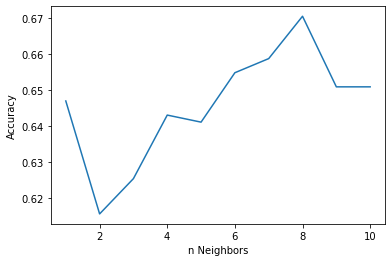

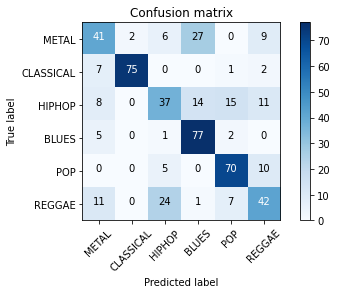

In [6]:
results_knn=[]
for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x,train_y)
    results_knn.append(knn.score(test_x,test_y))
    
max_accuracy_knn=max(results_knn)
best_k=1+results_knn.index(max(results_knn))
print("Max Accuracy is {:.3f} on test dataset with {} neighbors.\n".format(max_accuracy_knn,best_k))

plt.plot(numpy.arange(1,11),results_knn)
plt.xlabel("n Neighbors")
plt.ylabel("Accuracy")


knn=KNeighborsClassifier(n_neighbors=best_k)
knn.fit(train_x,train_y)
print("Training Score: {:.3f}".format(knn.score(train_x,train_y)))
print("Test score: {:.3f}".format(knn.score(test_x,test_y)))  

plot_cnf(knn,test_x,test_y,GENRES)

<br>
* <u>Application of Random Forest algorithm and its performance analysis</u>

Max Accuracy is 0.653 on test dataset with 19 estimators.

Training Score: 1.000
Test score: 0.653
---------------PERFORMANCE ANALYSIS----------------

Real Test dataset labels: 
['hiphop' 'blues' 'reggae' 'blues' 'hiphop' 'classical' 'blues' 'hiphop'
 'reggae' 'blues' 'reggae' 'reggae' 'reggae' 'reggae' 'pop' 'pop' 'hiphop'
 'reggae' 'blues' 'pop' 'metal' 'metal' 'pop' 'classical' 'pop'
 'classical' 'metal' 'hiphop' 'classical' 'blues' 'metal' 'metal' 'reggae'
 'reggae' 'reggae' 'hiphop' 'reggae' 'classical' 'metal' 'hiphop' 'reggae'
 'pop' 'classical' 'classical' 'pop' 'metal' 'classical' 'reggae'
 'classical' 'blues' 'metal' 'metal' 'classical' 'pop' 'reggae' 'metal'
 'metal' 'pop' 'classical' 'metal' 'pop' 'blues' 'classical' 'blues'
 'metal' 'metal' 'hiphop' 'hiphop' 'reggae' 'blues' 'classical' 'reggae'
 'classical' 'reggae' 'metal' 'classical' 'hiphop' 'blues' 'metal'
 'reggae' 'reggae' 'blues' 'blues' 'hiphop' 'reggae' 'metal' 'blues' 'pop'
 'blues' 'blues' 'reggae' 'metal' 'cl

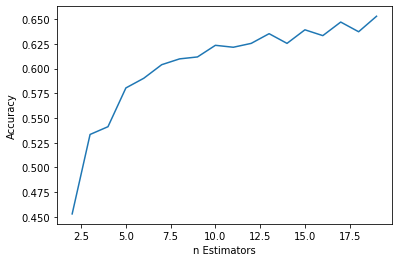

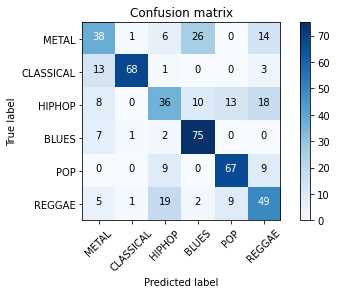

In [7]:
results_forest=[]
for i in range(2,20):
    forest=RandomForestClassifier(random_state=42,n_estimators=i)
    forest.fit(train_x,train_y)
    results_forest.append(forest.score(test_x,test_y))
    
max_accuracy_forest=max(results_forest)
best_n_est=2+results_forest.index(max(results_forest))
print("Max Accuracy is {:.3f} on test dataset with {} estimators.\n".format(max_accuracy_forest,best_n_est))

plt.plot(numpy.arange(2,20),results_forest)
plt.xlabel("n Estimators")
plt.ylabel("Accuracy")


forest=RandomForestClassifier(random_state=42,n_estimators=best_n_est)
forest.fit(train_x,train_y)
print("Training Score: {:.3f}".format(forest.score(train_x,train_y)))
print("Test score: {:.3f}".format(forest.score(test_x,test_y)))

plot_cnf(forest,test_x,test_y,GENRES)

<br>
* <u>Application of SVM algorithm and its performance analysis</u>

Training Score: 1.000
Test score: 0.700
---------------PERFORMANCE ANALYSIS----------------

Real Test dataset labels: 
['hiphop' 'blues' 'reggae' 'blues' 'hiphop' 'classical' 'blues' 'hiphop'
 'reggae' 'blues' 'reggae' 'reggae' 'reggae' 'reggae' 'pop' 'pop' 'hiphop'
 'reggae' 'blues' 'pop' 'metal' 'metal' 'pop' 'classical' 'pop'
 'classical' 'metal' 'hiphop' 'classical' 'blues' 'metal' 'metal' 'reggae'
 'reggae' 'reggae' 'hiphop' 'reggae' 'classical' 'metal' 'hiphop' 'reggae'
 'pop' 'classical' 'classical' 'pop' 'metal' 'classical' 'reggae'
 'classical' 'blues' 'metal' 'metal' 'classical' 'pop' 'reggae' 'metal'
 'metal' 'pop' 'classical' 'metal' 'pop' 'blues' 'classical' 'blues'
 'metal' 'metal' 'hiphop' 'hiphop' 'reggae' 'blues' 'classical' 'reggae'
 'classical' 'reggae' 'metal' 'classical' 'hiphop' 'blues' 'metal'
 'reggae' 'reggae' 'blues' 'blues' 'hiphop' 'reggae' 'metal' 'blues' 'pop'
 'blues' 'blues' 'reggae' 'metal' 'classical' 'metal' 'blues' 'blues'
 'pop' 'metal' 'metal' 'cl

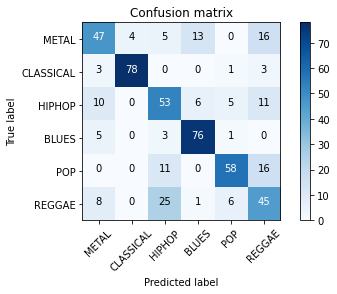

In [8]:
svm=SVC(C=100,gamma=0.08)
svm.fit(train_x,train_y)
print("Training Score: {:.3f}".format(svm.score(train_x,train_y)))
print("Test score: {:.3f}".format(svm.score(test_x,test_y)))

plot_cnf(svm,test_x,test_y,GENRES)

<br>
<br>
* <u>Application of Neural Network algorithm and its performance analysis</u>?????

/Users/akshat/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Training Score: 1.000
Test score: 0.676
---------------PERFORMANCE ANALYSIS----------------

Real Test dataset labels: 
['hiphop' 'blues' 'reggae' 'blues' 'hiphop' 'classical' 'blues' 'hiphop'
 'reggae' 'blues' 'reggae' 'reggae' 'reggae' 'reggae' 'pop' 'pop' 'hiphop'
 'reggae' 'blues' 'pop' 'metal' 'metal' 'pop' 'classical' 'pop'
 'classical' 'metal' 'hiphop' 'classical' 'blues' 'metal' 'metal' 'reggae'
 'reggae' 'reggae' 'hiphop' 'reggae' 'classical' 'metal' 'hiphop' 'reggae'
 'pop' 'classical' 'classical' 'pop' 'metal' 'classical' 'reggae'
 'classical' 'blues' 'metal' 'metal' 'classical' 'pop' 'reggae' 'metal'
 'metal' 'pop' 'classical' 'metal' 'pop' 'blues' 'classical' 'blues'
 'metal' 'metal' 'hiphop' 'hiphop' 'reggae' 'blues' 'classical' 'reggae'
 'classical' 'reggae' 'metal' 'classical' 'hiphop' 'blues' 'metal'
 'reggae' 'reggae' 'blues' 'blues' 'hiphop' 'reggae' 'metal' 'blues' 'pop'
 'blues' 'blues' 'reggae' 'metal' 'classical' 'metal' 'blues' 'blues'
 'pop' 'metal' 'metal' 'cl

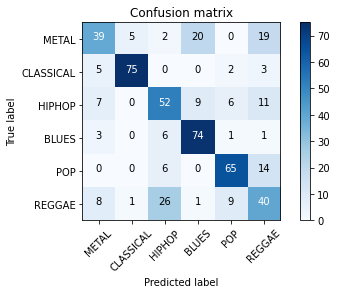

In [8]:
neural=MLPClassifier(max_iter=400,random_state=2,hidden_layer_sizes=[40,40])
neural.fit(train_x,train_y)
print("Training Score: {:.3f}".format(neural.score(train_x,train_y)))
print("Test score: {:.3f}".format(neural.score(test_x,test_y)))

plot_cnf(neural,test_x,test_y,GENRES)